In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv

In [2]:
url = "https://desafiogrupo1.s3.us-east-1.amazonaws.com/PhiUSIIL_Phishing_URL_Dataset.csv"
df = pd.read_csv(url, nrows=10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILENAME                    10 non-null     object 
 1   URL                         10 non-null     object 
 2   URLLength                   10 non-null     int64  
 3   Domain                      10 non-null     object 
 4   DomainLength                10 non-null     int64  
 5   IsDomainIP                  10 non-null     int64  
 6   TLD                         10 non-null     object 
 7   URLSimilarityIndex          10 non-null     int64  
 8   CharContinuationRate        10 non-null     float64
 9   TLDLegitimateProb           10 non-null     float64
 10  URLCharProb                 10 non-null     float64
 11  TLDLength                   10 non-null     int64  
 12  NoOfSubDomain               10 non-null     int64  
 13  HasObfuscation              10 non-nul

In [146]:
df.sample(frac=1, random_state=42)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
136221,827598.txt,https://www.northcm.ac.th,24,www.northcm.ac.th,17,0,th,100.000000,0.800000,0.000510,...,0,0,1,47,3,4,69,7,115,1
56609,oph00308.txt,https://unitedmartialartscenters.com/at0/mygov...,59,unitedmartialartscenters.com,28,0,com,33.522664,1.000000,0.522907,...,1,0,1,0,2,0,0,0,1,0
46393,8112660.txt,https://email.mail1.onesignal.os.tc/c/ejwcz02u...,385,email.mail1.onesignal.os.tc,27,0,tc,3.199329,0.458333,0.000046,...,0,0,0,0,0,0,0,0,1,0
129746,8135291.txt,http://uqr.to/1il1z,19,uqr.to,6,0,to,53.846154,1.000000,0.000896,...,0,0,0,0,0,0,1,0,1,0
131464,586561.txt,https://www.woolworthsrewards.com.au,35,www.woolworthsrewards.com.au,28,0,au,100.000000,0.857143,0.010086,...,1,0,1,33,7,8,15,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,34624.txt,https://www.greenmountainenergy.com,34,www.greenmountainenergy.com,27,0,com,100.000000,1.000000,0.522907,...,1,0,1,26,6,16,169,15,40,1
103694,776101.txt,https://www.leadcastingcall.com,30,www.leadcastingcall.com,23,0,com,100.000000,1.000000,0.522907,...,0,0,1,25,9,22,87,1,93,1
131932,8088343.txt,https://aruba.serveice-mein-auth.com/kqtxa8j9v...,114,aruba.serveice-mein-auth.com,28,0,com,11.574038,0.375000,0.522907,...,0,0,0,0,0,0,0,0,0,0
146867,823092.txt,https://www.fedarb.com,21,www.fedarb.com,14,0,com,100.000000,1.000000,0.522907,...,0,0,1,24,36,48,102,1,50,1


# LIMPIEZA

In [179]:
df['HasPopup'] = (df['NoOfPopup'] >= 1).astype(int)

In [180]:
df["Nivel3_Alta"] = ((df["IsDomainIP"] == 1) |((df["HasPasswordField"] == 1) & (df["IsHTTPS"] == 0)) |(df["HasExternalFormSubmit"] == 1)).astype(int)

df["Nivel2_Media"] = ((df["ObfuscationRatio"] > 0.2) |(df["DomainLength"] > 25) |(df["NoOfSubDomain"] > 3)).astype(int)

df["Nivel1_Baja"] = ((df["DomainTitleMatchScore"] < 1.0) |(df["TLDLegitimateProb"] < 0.25) |(df["NoOfPopup"] > 0)).astype(int)

In [181]:
df['IsPhishing'] = ((df['Nivel3_Alta'] == 1) | (df['Nivel2_Media'] == 1) | (df['Nivel1_Baja'] == 1)).astype(int)

In [165]:
phishing = df[df["IsPhishing"] == 1].sample(n=10, random_state=23842)
no_phishing = df[df["IsPhishing"] == 0].sample(n=10, random_state=23842)

# Unirlos
df_sample = pd.concat([phishing, no_phishing], ignore_index=True)
df_sample = df_sample.drop(columns=["Nivel3_Alta", "Nivel2_Media", "Nivel1_Baja", "IsPhishing","HasPopup"])
df_sample

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,mw15707.txt,http://www.oshgiutn.gq,21,www.oshgiutn.gq,15,0,gq,48.484848,1.000000,0.000053,...,0,0,0,0,0,0,0,0,0,0
1,766912.txt,https://www.solder.party,23,www.solder.party,16,0,party,100.000000,1.000000,0.000031,...,0,0,1,13,2,7,22,0,14,1
2,709293.txt,https://www.toysnbricks.com,26,www.toysnbricks.com,19,0,com,100.000000,1.000000,0.522907,...,0,0,1,30,7,12,201,0,244,1
3,237646.txt,https://www.fieldforcetracker.com,32,www.fieldforcetracker.com,25,0,com,100.000000,1.000000,0.522907,...,0,0,1,37,34,34,187,12,193,1
4,mw77304.txt,http://www.jackiekate.xyz,24,www.jackiekate.xyz,18,0,xyz,66.666667,1.000000,0.001750,...,0,0,0,0,0,0,0,0,0,0
5,oph02066.txt,http://u1930069.cp.regruhosting.ru/sucarsal/,43,u1930069.cp.regruhosting.ru,27,0,ru,58.662830,0.833333,0.018013,...,0,0,1,0,1,1,0,0,2,0
6,91638.txt,https://www.stadt.bamberg.de,27,www.stadt.bamberg.de,20,0,de,100.000000,0.615385,0.032650,...,0,0,1,11,5,17,197,0,4,1
7,243572.txt,https://www.mjukbiltvatt.se,26,www.mjukbiltvatt.se,19,0,se,100.000000,1.000000,0.004019,...,0,0,0,15,4,8,97,0,97,1
8,491573.txt,https://www.touchstoneinfotech.com,33,www.touchstoneinfotech.com,26,0,com,100.000000,1.000000,0.522907,...,1,0,1,47,36,33,184,0,208,1
9,mw210593.txt,http://www.proteger.at,21,www.proteger.at,15,0,at,74.655647,1.000000,0.003878,...,0,0,0,0,0,0,1,0,1,0


In [166]:
df_sample.to_csv("df_sample_20.csv")

In [182]:
df = df[["DomainLength","IsDomainIP",'NoOfSubDomain','HasObfuscation','ObfuscationRatio','CharContinuationRate','TLDLegitimateProb','URLCharProb',
           'HasPasswordField','IsHTTPS','HasExternalFormSubmit','DomainTitleMatchScore','HasPopup','NoOfiFrame','Bank','Pay','Crypto','DomainTitleMatchScore',
           'URLTitleMatchScore','Nivel3_Alta','Nivel2_Media','Nivel1_Baja','IsPhishing']]
df

,DomainLength,IsDomainIP,NoOfSubDomain,HasObfuscation,ObfuscationRatio,CharContinuationRate,TLDLegitimateProb,URLCharProb,HasPasswordField,IsHTTPS,...,NoOfiFrame,Bank,Pay,Crypto,DomainTitleMatchScore,URLTitleMatchScore,Nivel3_Alta,Nivel2_Media,Nivel1_Baja,IsPhishing
0,24,0,1,0,0.0,1.000000,0.522907,0.061933,0,1,...,1,1,0,0,0.000000,0.000000,0,0,1,1
1,16,0,1,0,0.0,0.666667,0.032650,0.050207,0,1,...,0,0,0,0,55.555556,55.555556,0,0,1,1
2,22,0,2,0,0.0,0.866667,0.028555,0.064129,0,1,...,0,0,0,0,46.666667,46.666667,0,0,1,1
3,19,0,1,0,0.0,1.000000,0.522907,0.057606,0,1,...,12,0,1,1,0.000000,0.000000,0,0,1,1
4,26,0,1,0,0.0,1.000000,0.079963,0.059441,0,1,...,2,1,1,0,100.000000,100.000000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,22,0,1,0,0.0,1.000000,0.522907,0.058739,0,1,...,0,0,1,0,100.000000,100.000000,0,0,0,0
235791,21,0,2,0,0.0,0.785714,0.028555,0.053834,0,1,...,0,0,1,0,0.000000,0.000000,0,0,1,1
235792,23,0,1,0,0.0,1.000000,0.003319,0.063093,0,1,...,0,0,0,0,100.000000,100.000000,0,0,1,1
235793,47,0,2,0,0.0,0.465116,0.000961,0.050211,1,1,...,2,0,0,0,0.000000,0.000000,0,1,1,1


In [ ]:
conditions = [
    (df["IsPhishing"] == 0),                         
    (df["Nivel3_Alta"] == 1),                        
    (df["Nivel2_Media"] == 1) | (df["Nivel1_Baja"] == 1) 
]

choices = ["Info", "Incidencia", "Alerta"]

df["type"] = np.select(conditions, choices, default="Info")

In [186]:
df["indicators"] = df["IsPhishing"].map({1: "Posible phishing", 0: "Correo seguro"})

In [188]:
df["severity"] = df["IsPhishing"]

In [189]:
df

,DomainLength,IsDomainIP,NoOfSubDomain,HasObfuscation,ObfuscationRatio,CharContinuationRate,TLDLegitimateProb,URLCharProb,HasPasswordField,IsHTTPS,...,Crypto,DomainTitleMatchScore,URLTitleMatchScore,Nivel3_Alta,Nivel2_Media,Nivel1_Baja,IsPhishing,type,indicators,severity
0,24,0,1,0,0.0,1.000000,0.522907,0.061933,0,1,...,0,0.000000,0.000000,0,0,1,1,Alerta,Posible phishing,1
1,16,0,1,0,0.0,0.666667,0.032650,0.050207,0,1,...,0,55.555556,55.555556,0,0,1,1,Alerta,Posible phishing,1
2,22,0,2,0,0.0,0.866667,0.028555,0.064129,0,1,...,0,46.666667,46.666667,0,0,1,1,Alerta,Posible phishing,1
3,19,0,1,0,0.0,1.000000,0.522907,0.057606,0,1,...,1,0.000000,0.000000,0,0,1,1,Alerta,Posible phishing,1
4,26,0,1,0,0.0,1.000000,0.079963,0.059441,0,1,...,0,100.000000,100.000000,0,1,1,1,Alerta,Posible phishing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,22,0,1,0,0.0,1.000000,0.522907,0.058739,0,1,...,0,100.000000,100.000000,0,0,0,0,Info,Correo seguro,0
235791,21,0,2,0,0.0,0.785714,0.028555,0.053834,0,1,...,0,0.000000,0.000000,0,0,1,1,Alerta,Posible phishing,1
235792,23,0,1,0,0.0,1.000000,0.003319,0.063093,0,1,...,0,100.000000,100.000000,0,0,1,1,Alerta,Posible phishing,1
235793,47,0,2,0,0.0,0.465116,0.000961,0.050211,1,1,...,0,0.000000,0.000000,0,1,1,1,Alerta,Posible phishing,1


In [124]:
df_test_alta  = df[df['Nivel3_Alta'] == 1][:40]
df_test_media = df[df['Nivel2_Media'] == 1][:40]
df_test_baja  = df[df['Nivel1_Baja'] == 1][:40]
df_test_nophis = df[df['IsPhishing'] == 0][:40]

df_final = pd.concat([df_test_alta,df_test_media,df_test_baja,df_test_nophis], ignore_index=True)
df_final

,DomainLength,IsDomainIP,NoOfSubDomain,HasObfuscation,ObfuscationRatio,CharContinuationRate,TLDLegitimateProb,URLCharProb,HasPasswordField,IsHTTPS,...,NoOfiFrame,Bank,Pay,Crypto,DomainTitleMatchScore,URLTitleMatchScore,Nivel3_Alta,Nivel2_Media,Nivel1_Baja,IsPhishing
0,19,0,1,0,0.0,1.000000,0.522907,0.064599,1,1,...,0,1,1,1,100.0,100.0,1,0,0,1
1,18,0,1,0,0.0,1.000000,0.522907,0.070239,0,1,...,2,1,0,0,100.0,100.0,1,0,0,1
2,20,0,2,0,0.0,0.538462,0.014148,0.055438,0,1,...,0,0,0,0,0.0,0.0,1,0,1,1
3,26,0,3,0,0.0,0.684211,0.010086,0.056433,0,1,...,5,0,1,1,0.0,0.0,1,1,1,1
4,13,1,2,0,0.0,0.444444,0.000000,0.001223,0,0,...,0,0,0,0,0.0,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,23,0,1,0,0.0,1.000000,0.522907,0.064075,0,1,...,2,1,1,0,100.0,100.0,0,0,0,0
156,20,0,1,0,0.0,1.000000,0.522907,0.066899,0,1,...,1,1,0,0,100.0,100.0,0,0,0,0
157,16,0,1,0,0.0,1.000000,0.522907,0.058544,0,1,...,3,1,0,0,100.0,100.0,0,0,0,0
158,20,0,1,0,0.0,1.000000,0.522907,0.058645,0,1,...,0,1,0,0,100.0,100.0,0,0,0,0


In [139]:
duplicadas = df_final.columns[df_final.columns.duplicated()].tolist()
print("Columnas duplicadas:", duplicadas)

Columnas duplicadas: []


In [138]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]  # elimina duplicadas (deja la primera)

In [ ]:
df_final.sample(frac=1, random_state=42)

df.to_csv("df_train_phishing.csv")

# API

In [3]:
load_dotenv()
VT_BASE = "https://www.virustotal.com/api/v3"
API_KEY = os.environ.get("VT_API_KEY")
if not API_KEY:
    raise RuntimeError("VT_API_KEY no definida. Exporta tu API key en la variable de entorno VT_API_KEY.")

HEADERS = {"accept": "application/json", "x-apikey": API_KEY}

In [7]:
import requests
import base64
import time
import json
from collections import OrderedDict

URL_KEYS_ORDER = ["url", "last_analysis_stats", "status", "network_location"]
NETWORK_LOCATION_KEYS_ORDER = [
    "whois", "tags", "last_dns_records", "popularity_ranks", "last_analysis_date",
    "last_https_certificate", "last_analysis_stats", "last_dns_records_date",
    "last_modification_date", "registrar", "reputation", "expiration_date",
    "tld", "last_https_certificate_date", "jarm", "categories"
]

NETLOC_FIELDS_DEFAULTS = {
    "whois": "",
    "tags": [],
    "last_dns_records": [],
    "popularity_ranks": {},
    "last_https_certificate": {},
    "last_analysis_stats": {},
    "categories": {}
}

# -----------------------------
# Funciones auxiliares
def _remove_key_recursive(obj, key_to_remove="last_analysis_results"):
    if isinstance(obj, dict):
        if key_to_remove in obj:
            obj.pop(key_to_remove)
        for v in obj.values():
            _remove_key_recursive(v, key_to_remove)
    elif isinstance(obj, list):
        for item in obj:
            _remove_key_recursive(item, key_to_remove)

def _ordered_network_location(netloc_attrs):
    netloc_out = OrderedDict()
    for k in NETWORK_LOCATION_KEYS_ORDER:
        netloc_out[k] = netloc_attrs.get(k, NETLOC_FIELDS_DEFAULTS.get(k))
    _remove_key_recursive(netloc_out, "last_analysis_results")
    return netloc_out

def _ordered_url_object(url_result):
    od = OrderedDict()
    for k in URL_KEYS_ORDER:
        if k == "network_location" and url_result.get("network_location"):
            od[k] = _ordered_network_location(url_result["network_location"])
        else:
            od[k] = url_result.get(k)
    return od

# -----------------------------
# Función principal para consultar VT
def get_url_info(url, retries=2, timeout=10, pause_between_calls=1.0):
    url_id = base64.urlsafe_b64encode(url.encode()).decode().strip("=")
    result = {"url": url}

    # 1) /urls/{url_id}
    for attempt in range(retries+1):
        try:
            resp = requests.get(f"{VT_BASE}/urls/{url_id}", headers=HEADERS, timeout=timeout)
            if resp.status_code == 404:
                result["status"] = "URL NO REPORTADA"
                return _ordered_url_object(result)
            if resp.status_code == 401:
                result["status"] = "ERROR_AUTH"
                result["error"] = "401 Unauthorized - revisa tu API key."
                return _ordered_url_object(result)
            resp.raise_for_status()
            attrs = resp.json().get("data", {}).get("attributes", {}) or {}
            result["last_analysis_stats"] = attrs.get("last_analysis_stats", {
                "malicious": 0, "suspicious": 0, "undetected": 0, "harmless": 0, "timeout": 0
            })
            result["status"] = "OK"
            break
        except requests.exceptions.RequestException as e:
            if attempt < retries:
                time.sleep(5)
            else:
                result["status"] = "ERROR"
                result["error_url_object"] = str(e)
                return _ordered_url_object(result)

    time.sleep(pause_between_calls)

    # 2) network_location
    try:
        netloc_resp = requests.get(f"{VT_BASE}/urls/{url_id}/network_location", headers=HEADERS, timeout=timeout)
        if netloc_resp.status_code == 404:
            return _ordered_url_object(result)
        netloc_resp.raise_for_status()
        netloc_data_ref = netloc_resp.json().get("data", {}) or {}
        # attributes embebidos
        netloc_attrs = netloc_data_ref.get("attributes", {}) or {}
        result["network_location"] = netloc_attrs
    except requests.exceptions.RequestException as e:
        result["network_location"] = {}
        result["_error_network_location"] = str(e)

    return _ordered_url_object(result)

# -----------------------------
# Ejecutar para todas las URLs del archivo

def enriquecimiento_phishing(url):
    resultados = []

    r = get_url_info(url, retries=2, timeout=15, pause_between_calls=1.0)
    resultados.append(r)
    time.sleep(2)
    return resultados

def safe_get(d, path, default=None):
    keys = path.split(".")
    for key in keys:
        if isinstance(d, dict) and key in d:
            d = d[key]
        else:
            return default
    return d

def tablas_enriquecimiento_phishing(url):
    filas = []
    for r in enriquecimiento_phishing(url):
        fila = {
            "url": r.get("url"),
            "status": r.get("status"),
            "malicious": safe_get(r, "last_analysis_stats.malicious"),
            "suspicious": safe_get(r, "last_analysis_stats.suspicious"),
            "undetected": safe_get(r, "last_analysis_stats.undetected"),
            "harmless": safe_get(r, "last_analysis_stats.harmless"),
            "timeout": safe_get(r, "last_analysis_stats.timeout"),
            "whois": safe_get(r, "network_location.whois"),
            "tags": safe_get(r, "network_location.tags"),
            "dns_records": [rec.get("value") for rec in safe_get(r, "network_location.last_dns_records", []) if "value" in rec],
            "last_dns_records_date": safe_get(r, "network_location.last_dns_records_date"),
            "registrar": safe_get(r, "network_location.registrar"),
            "expiration_date": safe_get(r, "network_location.expiration_date"),
            "tld": safe_get(r, "network_location.tld"),
            "issuer": safe_get(r, "network_location.last_https_certificate.issuer"),
            "subject_CN": safe_get(r, "network_location.last_https_certificate.subject.CN"),
            "cert_not_before": safe_get(r, "network_location.last_https_certificate.validity.not_before"),
            "cert_not_after": safe_get(r, "network_location.last_https_certificate.validity.not_after"),
            "cert_key_size": safe_get(r, "network_location.last_https_certificate.public_key.key_size"),
            "thumbprint_sha256": safe_get(r, "network_location.last_https_certificate.thumbprint_sha256"),
            "reputation": safe_get(r, "network_location.reputation"),
            "popularity_ranks": safe_get(r, "network_location.popularity_ranks"),
            "jarm": safe_get(r, "network_location.jarm"),
            "categories": safe_get(r, "network_location.categories"),
        }
        filas.append(fila)
    return pd.DataFrame(filas)
df_extra = tablas_enriquecimiento_phishing(df['URL'].iloc[0])
# df_extra = pd.DataFrame(filas)

In [8]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    1 non-null      object
 1   status                 1 non-null      object
 2   malicious              1 non-null      int64 
 3   suspicious             1 non-null      int64 
 4   undetected             1 non-null      int64 
 5   harmless               1 non-null      int64 
 6   timeout                1 non-null      int64 
 7   whois                  1 non-null      object
 8   tags                   1 non-null      object
 9   dns_records            1 non-null      object
 10  last_dns_records_date  1 non-null      int64 
 11  registrar              1 non-null      object
 12  expiration_date        1 non-null      int64 
 13  tld                    1 non-null      object
 14  issuer                 1 non-null      object
 15  subject_CN             1 no

In [66]:
# Función auxiliar para extraer datos de forma segura
def safe_get(d, path, default=None):
    keys = path.split(".")
    for key in keys:
        if isinstance(d, dict) and key in d:
            d = d[key]
        else:
            return default
    return d

filas = []
for r in enriquecimiento_phishing():
    fila = {
        "URL": r.get("url"),
        "status": r.get("status"),
        "malicious": safe_get(r, "last_analysis_stats.malicious"),
        "suspicious": safe_get(r, "last_analysis_stats.suspicious"),
        "undetected": safe_get(r, "last_analysis_stats.undetected"),
        "harmless": safe_get(r, "last_analysis_stats.harmless"),
        "timeout": safe_get(r, "last_analysis_stats.timeout"),
        "whois": safe_get(r, "network_location.whois"),
        "tags": safe_get(r, "network_location.tags"),
        "dns_records": [rec.get("value") for rec in safe_get(r, "network_location.last_dns_records", []) if "value" in rec],
        "last_dns_records_date": safe_get(r, "network_location.last_dns_records_date"),
        "registrar": safe_get(r, "network_location.registrar"),
        "expiration_date": safe_get(r, "network_location.expiration_date"),
        "tld": safe_get(r, "network_location.tld"),
        "issuer": safe_get(r, "network_location.last_https_certificate.issuer"),
        "subject_CN": safe_get(r, "network_location.last_https_certificate.subject.CN"),
        "cert_not_before": safe_get(r, "network_location.last_https_certificate.validity.not_before"),
        "cert_not_after": safe_get(r, "network_location.last_https_certificate.validity.not_after"),
        "cert_key_size": safe_get(r, "network_location.last_https_certificate.public_key.key_size"),
        "thumbprint_sha256": safe_get(r, "network_location.last_https_certificate.thumbprint_sha256"),
        "reputation": safe_get(r, "network_location.reputation"),
        "popularity_ranks": safe_get(r, "network_location.popularity_ranks"),
        "jarm": safe_get(r, "network_location.jarm"),
        "categories": safe_get(r, "network_location.categories"),
    }
    filas.append(fila)

df_extra = pd.DataFrame(filas)

In [67]:
df_extra

,URL,status,malicious,suspicious,undetected,harmless,timeout,whois,tags,dns_records,...,issuer,subject_CN,cert_not_before,cert_not_after,cert_key_size,thumbprint_sha256,reputation,popularity_ranks,jarm,categories
0,https://desafiogrupo1.s3.us-east-1.amazonaws.c...,URL NO REPORTADA,None,None,None,None,None,None,None,[],...,None,None,None,None,None,None,None,None,None,None


# DATA BASE

In [17]:
import pandas as pd
import numpy as np
import psycopg2
from datetime import datetime
from phishing import *

def limpieza_phishing(dict):
    df = pd.DataFrame([dict])
    df['HasPopup'] = (df['NoOfPopup'] >= 1).astype(int)
    df["Nivel3_Alta"] = ((df["IsDomainIP"] == 1) |((df["HasPasswordField"] == 1) & (df["IsHTTPS"] == 0)) |(df["HasExternalFormSubmit"] == 1)).astype(int)
    df["Nivel2_Media"] = ((df["ObfuscationRatio"] > 0.2) |(df["DomainLength"] > 25) |(df["NoOfSubDomain"] > 3)).astype(int)
    df["Nivel1_Baja"] = ((df["DomainTitleMatchScore"] < 1.0) |(df["TLDLegitimateProb"] < 0.25) |(df["NoOfPopup"] > 0)).astype(int)
    df['IsPhishing'] = ((df['Nivel3_Alta'] == 1) | (df['Nivel2_Media'] == 1) | (df['Nivel1_Baja'] == 1)).astype(int)

    conditions = [(df["IsPhishing"] == 0),(df["Nivel3_Alta"] == 1),(df["Nivel2_Media"] == 1) | (df["Nivel1_Baja"] == 1) ]
    choices = ["Info", "Incidencia", "Alerta"]
    df["type"] = np.select(conditions, choices, default="Info")
    df["indicators"] = df["IsPhishing"].map({1: "Posible phishing", 0: "Correo seguro"})
    df["severity"] = df["IsPhishing"]
    now = datetime.now()
    df['date'] = now.date()
    df['time'] = now.strftime("%H:%M:%S")
    
    conn = psycopg2.connect(
        dbname="desafiogrupo1",
        user="desafiogrupo1_user",
        password="g7jS0htW8QqiGPRymmJw0IJgb04QO3Jy",
        host="dpg-d36i177fte5s73bgaisg-a.oregon-postgres.render.com",
        port="5432"
    )
    
    cur = conn.cursor()
    records = [
        {
            "id": row['id'],
            "company_id": 1,
            "type": row['type'],
            "indicators": row['indicators'],
            "severity": row['severity'],
            "date": row['date'],
            "time": row['time'],
            "actions_taken": 1
        }
        for _, row in df.iterrows()
    ]

    cur.executemany("""
        INSERT INTO logs (id, company_id, type, indicators, severity, date, time, actions_taken)
        VALUES (%(id)s, %(company_id)s, %(type)s, %(indicators)s, %(severity)s, %(date)s, %(time)s, %(actions_taken)s)
    """, records)
    conn.commit()
    cur.close()
    conn.close()

    insertar_phishing_enriquecido(df)

In [196]:
x = df.iloc[0].to_dict()

In [202]:
limpieza_phishing(x)

In [12]:
import matplotlib.pyplot as plt

def dibujar_grafica():
    conn = psycopg2.connect(
            dbname="desafiogrupo1",
            user="desafiogrupo1_user",
            password="g7jS0htW8QqiGPRymmJw0IJgb04QO3Jy",
            host="dpg-d36i177fte5s73bgaisg-a.oregon-postgres.render.com",
            port="5432"
        )
        
    cur = conn.cursor()

    cur.execute("""
                SELECT indicators, COUNT(*) AS cantidad
                FROM logs
                WHERE indicators IN ('Correo seguro', 'Posible phishing')
                GROUP BY indicators;
            """)

    resultados = cur.fetchall()
        
    etiquetas = [r[0] for r in resultados]
    valores   = [r[1] for r in resultados]

    plt.figure()
    plt.pie(
            valores,
            labels=etiquetas,
            autopct=lambda p: f'{p:.0f}%' if p > 0 else '',
            startangle=90,
            wedgeprops={'width': 0.45}
            )
    plt.title('Distribución de indicadores')
    plt.axis('equal')
    plt.show()

    cur.close()
    conn.close()

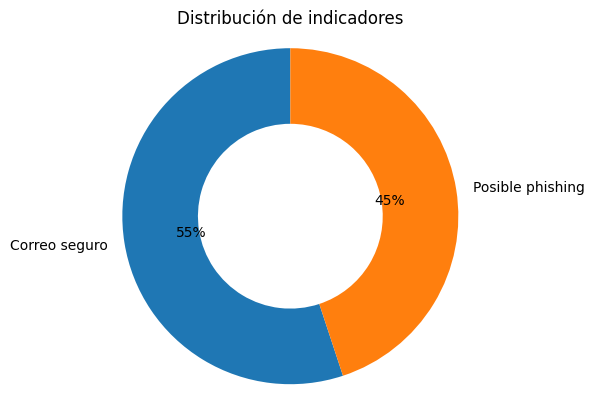

In [13]:
dibujar_grafica()

In [16]:
from phishing import *

limpieza_phishing(df.iloc[0].to_dict())

ProgrammingError: can't adapt type 'dict'